<a href="https://colab.research.google.com/github/Darshan0805/Advanced-Machine-Learning/blob/main/2348548_LReg_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Program_1_Dataset - Program_1_Dataset.csv')

In [3]:
df.head()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Crime_Rate        506 non-null    float64
 1   Zone_proportion   506 non-null    float64
 2   Non_Retail_Acres  506 non-null    float64
 3   CHAS              506 non-null    int64  
 4   NOX               506 non-null    float64
 5   Avg_rooms         506 non-null    float64
 6   AGE               506 non-null    float64
 7   Distance          506 non-null    float64
 8   RAD               506 non-null    int64  
 9   Property_TaxRate  506 non-null    int64  
 10  PTRATIO           506 non-null    float64
 11  B                 506 non-null    float64
 12  LSTAT             506 non-null    float64
 13  MValue            506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Crime_Rate,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
Zone_proportion,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
Non_Retail_Acres,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
Avg_rooms,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
Distance,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
Property_TaxRate,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [6]:
df.isnull()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.columns

Index(['Crime_Rate', 'Zone_proportion', 'Non_Retail_Acres', 'CHAS', 'NOX',
       'Avg_rooms', 'AGE', 'Distance', 'RAD', 'Property_TaxRate', 'PTRATIO',
       'B', 'LSTAT', 'MValue'],
      dtype='object')

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

Crime_Rate          0
Zone_proportion     0
Non_Retail_Acres    0
CHAS                0
NOX                 0
Avg_rooms           0
AGE                 0
Distance            0
RAD                 0
Property_TaxRate    0
PTRATIO             0
B                   0
LSTAT               0
MValue              0
dtype: int64

In [10]:
df.corr()['Avg_rooms'].sort_values()

LSTAT              -0.613808
Non_Retail_Acres   -0.391676
PTRATIO            -0.355501
NOX                -0.302188
Property_TaxRate   -0.292048
AGE                -0.240265
Crime_Rate         -0.219247
RAD                -0.209847
CHAS                0.091251
B                   0.128069
Distance            0.205246
Zone_proportion     0.311991
MValue              0.695360
Avg_rooms           1.000000
Name: Avg_rooms, dtype: float64

Text(0.5, 0, 'MValue')

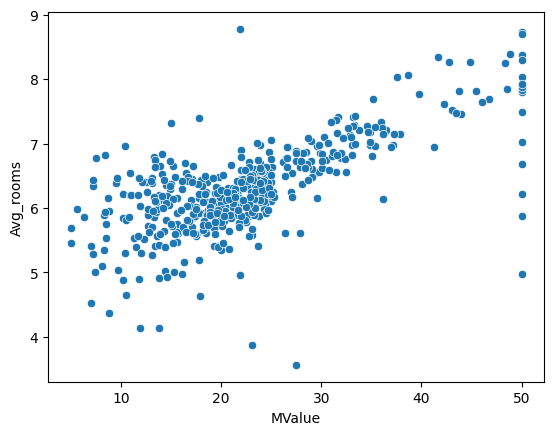

In [11]:
sns.scatterplot(data=df,y='Avg_rooms',x='MValue')
plt.ylabel("Avg_rooms")
plt.xlabel("MValue")